#### <strong>EDA - Olist E-commerce delivery performance analysis</strong>

#### <strong>Who is Olist ?</strong>

Olist is an e-commerce platform that offers online sales solutions and e-commerce services. 
Olist Store is a digital sales channel that is present in the largest marketplaces in Brazil, 
helping online and offline retailers sell on the country's main marketplaces. Olist also
offers integrated logistics services. Important to say here is that Olist was founded in February 2015 by Tiago Dalvi, as a spin-off
from Solidarium, a company created in 2007 as a shopping mall store that later became a 
marketplace for the sale of artisanal products.

#### <strong>Overview of the project</strong>
This project focuses on exploring data aimed at understanding how the evolution and delivery performance of the company Olist was during the period of 2017, where I carry out all the cleaning, modeling and visual creation steps of the results I achieved.

#### <strong>how olist database pool works ?</strong>

Here's an image of how this database pool works and how they relate to each other (Taken from Kaggle):

<img src="olist_databases.png" alt="Imagem dos Bds da olist" width="950" height="600">


#### Importing Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#### importing and processing the database

Obs-> Here we're going to import based in the image of the realaionship of the databases only the databases nescessary to do a performance analysis on deliveries made


In [2]:
# Importing databases
orders_dt = pd.read_excel('olist_orders_dataset_2017.xlsx')
customers_dt = pd.read_excel('olist_customers_dataset_2017.xlsx')
products_dt = pd.read_excel('olist_products_dataset_2017.xlsx')
order_items_dt = pd.read_excel('olist_order_items_dataset_2017.xlsx')
sellers_dt = pd.read_excel('olist_sellers_dataset_2017.xlsx')

display(orders_dt.head())
display(customers_dt.head())
display(products_dt.head())
display(order_items_dt.head())
display(sellers_dt.head())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,Unnamed: 0,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,39.0,346.0,2.0,400.0,27.0,5.0,20.0
2,2,0d009643171aee696f4733340bc2fdd0,perfumery,52.0,150.0,1.0,422.0,21.0,16.0,18.0
3,3,b1eae565a61935e0011ee7682fef9dc9,perfumery,49.0,460.0,2.0,267.0,17.0,13.0,17.0
4,4,8da90b37f0fb171b4877c124f965b1f6,perfumery,56.0,733.0,3.0,377.0,18.0,13.0,15.0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14
3,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.9,12.69
4,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.9,11.85


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Creating only one database for the performance analysis

In [3]:
# Merging the orders dataframe with customers dataframe
analysis_dt = orders_dt.merge(customers_dt, on="customer_id")

# Removing irrelevants columns
analysis_dt = analysis_dt.drop(["customer_unique_id", "customer_zip_code_prefix"], axis=1)

display(analysis_dt.head())


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,RN
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,congonhinhas,PR
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,nilopolis,RJ
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,faxinalzinho,RS


Now what we want is to put the caterogy name of the products in our "analysis_dt" to allow us perform future anlysis based on the name of the products, but for that we're gonna have to take a step back and first merge the "products_dt" with the "order_items_dt" because as we can see in the image of database model of olist, to merge the "products_dt" with the "order_dt" (which is becoming our "analysis_dt" now) is not directly possible due to a primary key problem here, so first we have to merge "products_dt" with the "order_items_dt", to them merge "order_items_dt" with "order_dt".    

In [4]:
# Merging the order items dataframe with products dataframe
order_items_modified_dt = order_items_dt.merge(products_dt, on="product_id")

# Removing irrelevants columns
order_items_modified_dt = order_items_modified_dt.drop(["Unnamed: 0","product_name_lenght", "product_description_lenght", 
                                                                     "product_photos_qty", "product_length_cm", "product_height_cm",
                                                                     "product_width_cm", "shipping_limit_date", "order_item_id", "product_weight_g"], axis=1)

display(order_items_modified_dt.head())

,order_id,product_id,seller_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff
2,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff
3,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
4,a0f9acf0b6294ed8561e32cde1a966bc,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,26.93,cool_stuff


We also want to put the seller state on the order_dt, but for that we have first to bring this data out of the "sellers_dt" to the "order_items_modified_dt", to then put in the dataset we want. 

In [5]:
# Merging the modified order items dataframe with sellers dataframe
order_items_modified_dt = order_items_modified_dt.merge(sellers_dt, on="seller_id")

# Removing irrelevants columns
order_items_modified_dt = order_items_modified_dt.drop(["seller_zip_code_prefix"], axis=1)

display(order_items_modified_dt.head())



,order_id,product_id,seller_id,price,freight_value,product_category_name,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,volta redonda,SP
2,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,volta redonda,SP
3,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,volta redonda,SP
4,a0f9acf0b6294ed8561e32cde1a966bc,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,26.93,cool_stuff,volta redonda,SP


Now we merge the "analysis_dt" with the "order_items_modified_dt"  

In [6]:
# Merging the analysis dataframe with the modified order items dataframe
analysis_dt = analysis_dt.merge(order_items_modified_dt, on="order_id")

display(analysis_dt.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,product_id,seller_id,price,freight_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,maua,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,pet_shop,belo horizonte,MG
2,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,congonhinhas,PR,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,147.90,27.36,auto,guarulhos,SP
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,nilopolis,RJ,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,59.99,15.17,auto,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,faxinalzinho,RS,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,19.90,16.05,furniture_decor,sao jose do rio pardo,SP


Because the focus here is on the delivery performance, i don't think the id columns is going to be useful, that being said just as a reference, we're going to keep just the order_id.

In [7]:
# Removing irrelevants columns
analysis_dt = analysis_dt.drop(["customer_id", "product_id", "seller_id"], axis=1)

display(analysis_dt.head())

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,price,freight_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,29.99,8.72,housewares,maua,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,RN,45.00,27.20,pet_shop,belo horizonte,MG
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,congonhinhas,PR,147.90,27.36,auto,guarulhos,SP
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,nilopolis,RJ,59.99,15.17,auto,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,faxinalzinho,RS,19.90,16.05,furniture_decor,sao jose do rio pardo,SP


For the delivery performance analysis, I believe we will need two date columns "order_delivered_customer_date" and "order_estimated_delivery_date", so the other date columns present, we will remove.

In [8]:
# Removing irrelevants columns
analysis_dt = analysis_dt.drop(["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date"], axis=1)

display(analysis_dt.head())


,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,price,freight_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10 21:25:13,2017-10-18,sao paulo,SP,29.99,8.72,housewares,maua,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02 00:28:42,2017-12-15,sao goncalo do amarante,RN,45.00,27.20,pet_shop,belo horizonte,MG
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-26 10:57:55,2017-08-01,congonhinhas,PR,147.90,27.36,auto,guarulhos,SP
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-26 12:55:51,2017-06-07,nilopolis,RJ,59.99,15.17,auto,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-02-02 14:08:10,2017-03-06,faxinalzinho,RS,19.90,16.05,furniture_decor,sao jose do rio pardo,SP


In [9]:
# Removing time information from dates
analysis_dt["order_delivered_customer_date"] = pd.to_datetime(analysis_dt["order_delivered_customer_date"]).dt.date
analysis_dt["order_delivered_customer_date"] = pd.to_datetime(analysis_dt["order_delivered_customer_date"])

analysis_dt["order_estimated_delivery_date"] = pd.to_datetime(analysis_dt["order_estimated_delivery_date"])

display(analysis_dt.head())

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,price,freight_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10,2017-10-18,sao paulo,SP,29.99,8.72,housewares,maua,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02,2017-12-15,sao goncalo do amarante,RN,45.00,27.20,pet_shop,belo horizonte,MG
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-26,2017-08-01,congonhinhas,PR,147.90,27.36,auto,guarulhos,SP
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-26,2017-06-07,nilopolis,RJ,59.99,15.17,auto,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-02-02,2017-03-06,faxinalzinho,RS,19.90,16.05,furniture_decor,sao jose do rio pardo,SP


As the analysis is focused on the performance of orders that were delivered, we will first only use the data where the "order_status" column is included as "delivered".

In [10]:
# Creating the dataframe with the "order_status" column having only "delivered".
delivered_analysis_dt = analysis_dt.loc[analysis_dt["order_status"] == "delivered", :]

display(delivered_analysis_dt.head())

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,price,freight_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10,2017-10-18,sao paulo,SP,29.99,8.72,housewares,maua,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02,2017-12-15,sao goncalo do amarante,RN,45.00,27.20,pet_shop,belo horizonte,MG
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-26,2017-08-01,congonhinhas,PR,147.90,27.36,auto,guarulhos,SP
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-26,2017-06-07,nilopolis,RJ,59.99,15.17,auto,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-02-02,2017-03-06,faxinalzinho,RS,19.90,16.05,furniture_decor,sao jose do rio pardo,SP


In [11]:
analysis_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45857 entries, 0 to 45856
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       45857 non-null  object        
 1   order_status                   45857 non-null  object        
 2   order_delivered_customer_date  45857 non-null  datetime64[ns]
 3   order_estimated_delivery_date  45857 non-null  datetime64[ns]
 4   customer_city                  45857 non-null  object        
 5   customer_state                 45857 non-null  object        
 6   price                          45857 non-null  float64       
 7   freight_value                  45857 non-null  float64       
 8   product_category_name          45857 non-null  object        
 9   seller_city                    45857 non-null  object        
 10  seller_state                   45857 non-null  object        
dtypes: datetime64[n


As we can see, 100% of all deliveries made in 2017 on olist had their status as "delivered".

An important point here is to understand that the order_id column may have duplicate values, this may have occurred because we have the customer_id and customer_unique_id columns within the "order_items_dt" database, the customer_unique_id can generate duplicates of the customer_id, as the customer_unique_id is to identify the customer who may have made several purchases on the list, and the customer_id is a unique code that identifies an order that the person made, so based on "order_items_dt" it may end up generating duplicates, which may then have generated duplicates in the column order_id at the time we merge the two bases, so we will remove all duplicates from the delivered_analysis_dt base before we continue.

In [12]:
# Removing Duplicate values and reseting the index
delivered_analysis_dt.drop_duplicates(subset='order_id', inplace=True)
delivered_analysis_dt.reset_index(drop=True, inplace=True)
display(delivered_analysis_dt.head())

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,price,freight_value,product_category_name,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10,2017-10-18,sao paulo,SP,29.99,8.72,housewares,maua,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02,2017-12-15,sao goncalo do amarante,RN,45.00,27.20,pet_shop,belo horizonte,MG
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-26,2017-08-01,congonhinhas,PR,147.90,27.36,auto,guarulhos,SP
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-26,2017-06-07,nilopolis,RJ,59.99,15.17,auto,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-02-02,2017-03-06,faxinalzinho,RS,19.90,16.05,furniture_decor,sao jose do rio pardo,SP


In [13]:
delivered_analysis_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40115 entries, 0 to 40114
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       40115 non-null  object        
 1   order_status                   40115 non-null  object        
 2   order_delivered_customer_date  40115 non-null  datetime64[ns]
 3   order_estimated_delivery_date  40115 non-null  datetime64[ns]
 4   customer_city                  40115 non-null  object        
 5   customer_state                 40115 non-null  object        
 6   price                          40115 non-null  float64       
 7   freight_value                  40115 non-null  float64       
 8   product_category_name          40115 non-null  object        
 9   seller_city                    40115 non-null  object        
 10  seller_state                   40115 non-null  object        
dtypes: datetime64[n

Now that we have the order_id column without duplicates, at this point we will create new columns in the "delivered_analysis_dt", with the dates "order_delivered_customer_date" and "order_estimated_delivery_date", dividing each of the columns into day, month and year, these new columns can assist in some specific analyzes.

In [14]:
# Creating the "year", "number of month", "month name" and "day" column for the order_delivered_customer_year 
delivered_analysis_dt['order_delivered_customer_year'] = delivered_analysis_dt['order_delivered_customer_date'].dt.year
delivered_analysis_dt['order_delivered_customer_num_month'] = delivered_analysis_dt['order_delivered_customer_date'].dt.month
delivered_analysis_dt['order_delivered_customer_month_name'] = delivered_analysis_dt['order_delivered_customer_date'].dt.month_name()
delivered_analysis_dt['order_delivered_customer_day'] = delivered_analysis_dt['order_delivered_customer_date'].dt.day

# Creating the "year", "number of month", "month name" and "day" column for the order_estimated_delivery_date  
delivered_analysis_dt['order_estimated_delivered_year'] = delivered_analysis_dt['order_estimated_delivery_date'].dt.year
delivered_analysis_dt['order_estimated_delivered_num_month'] = delivered_analysis_dt['order_estimated_delivery_date'].dt.month
delivered_analysis_dt['order_estimated_delivered_month_name'] = delivered_analysis_dt['order_estimated_delivery_date'].dt.month_name()
delivered_analysis_dt['order_estimated_delivered_day'] = delivered_analysis_dt['order_estimated_delivery_date'].dt.day

display(delivered_analysis_dt.head())

,order_id,order_status,order_delivered_customer_date,order_estimated_delivery_date,customer_city,customer_state,price,freight_value,product_category_name,seller_city,seller_state,order_delivered_customer_year,order_delivered_customer_num_month,order_delivered_customer_month_name,order_delivered_customer_day,order_estimated_delivered_year,order_estimated_delivered_num_month,order_estimated_delivered_month_name,order_estimated_delivered_day
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-10,2017-10-18,sao paulo,SP,29.99,8.72,housewares,maua,SP,2017,10,October,10,2017,10,October,18
1,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-12-02,2017-12-15,sao goncalo do amarante,RN,45.00,27.20,pet_shop,belo horizonte,MG,2017,12,December,2,2017,12,December,15
2,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-26,2017-08-01,congonhinhas,PR,147.90,27.36,auto,guarulhos,SP,2017,7,July,26,2017,8,August,1
3,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-26,2017-06-07,nilopolis,RJ,59.99,15.17,auto,atibaia,SP,2017,5,May,26,2017,6,June,7
4,76c6e866289321a7c93b82b54852dc33,delivered,2017-02-02,2017-03-06,faxinalzinho,RS,19.90,16.05,furniture_decor,sao jose do rio pardo,SP,2017,2,February,2,2017,3,March,6


In [15]:
delivered_analysis_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40115 entries, 0 to 40114
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   order_id                              40115 non-null  object        
 1   order_status                          40115 non-null  object        
 2   order_delivered_customer_date         40115 non-null  datetime64[ns]
 3   order_estimated_delivery_date         40115 non-null  datetime64[ns]
 4   customer_city                         40115 non-null  object        
 5   customer_state                        40115 non-null  object        
 6   price                                 40115 non-null  float64       
 7   freight_value                         40115 non-null  float64       
 8   product_category_name                 40115 non-null  object        
 9   seller_city                           40115 non-null  object        
 10

#### Data visualization

Where possible, I'll use the olist brand colours, wich i found available in this website -> https://designsystem.olist.io/latest/pt-BR/design-tokens/colors

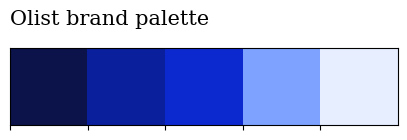

In [16]:
sns.palplot(['#0b134a', '#0a1f9c', '#0c29d0', '#7da2ff', '#e6eeff'])
plt.title("Olist brand palette ",loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

#### Which product category delivered the most and which delivered the least? 


In [17]:
# Creating the Dataframes
product_category_delivered_the_most = delivered_analysis_dt[['product_category_name', 'order_id']].groupby('product_category_name').count().sort_values(by='order_id', ascending=False).reset_index()[:10]
product_category_delivered_the_least = delivered_analysis_dt[['product_category_name', 'order_id']].groupby('product_category_name').count().sort_values(by='order_id', ascending=False).reset_index()[-10:]

# Displaying both dataframes
display(product_category_delivered_the_most)
display(product_category_delivered_the_least)

,product_category_name,order_id
0,bed_bath_table,4097
1,sports_leisure,3345
2,health_beauty,3125
3,furniture_decor,2895
4,computers_accessories,2405
5,toys,2261
6,housewares,2252
7,cool_stuff,2042
8,watches_gifts,1922
9,telephony,1844


,product_category_name,order_id
61,books_imported,10
62,party_supplies,9
63,cine_photo,8
64,la_cuisine,8
65,flowers,7
66,fashion_childrens_clothes,4
67,small_appliances_home_oven_and_coffee,3
68,security_and_services,2
69,diapers_and_hygiene,1
70,arts_and_craftmanship,1


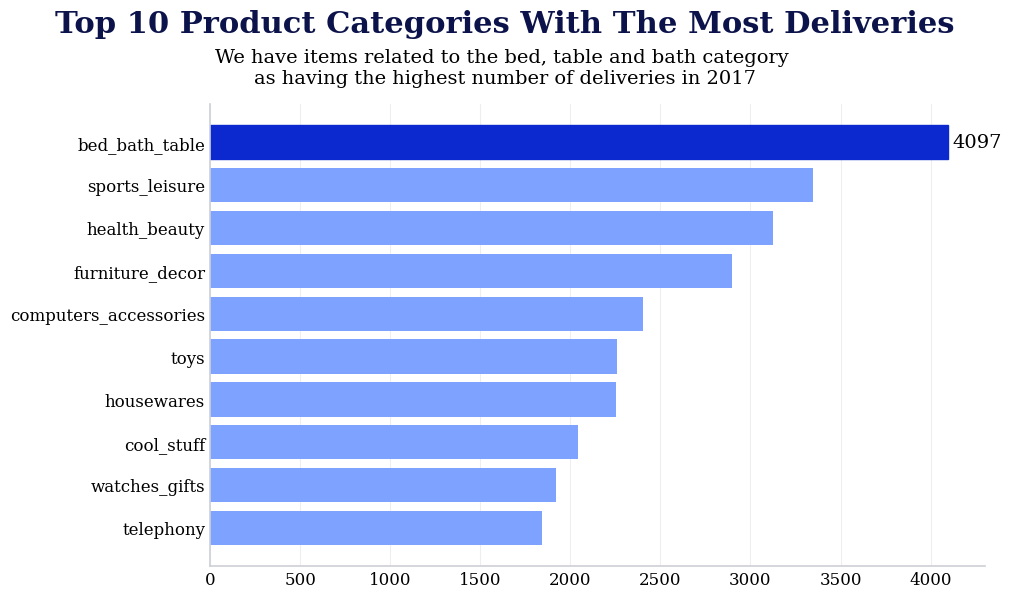

In [18]:
# Plotting the "Top 10 Product Categories With The Most Deliveries" chart

# Creating a horizontal bar chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) 

bars = ax.barh(product_category_delivered_the_most['product_category_name'], 
               product_category_delivered_the_most['order_id'], color= '#7da2ff')

# Flipping the Y axis to align the largest category at the top
plt.gca().invert_yaxis()

# Highlighting the bar with the highest value
bars[0].set_color('#0c29d0')

# Adding labels only to the bar with the highest value
plt.bar_label(bars, labels=[max(product_category_delivered_the_most['order_id']) if x == max(product_category_delivered_the_most['order_id']) else '' for x in product_category_delivered_the_most['order_id']],
              padding=3, fontsize=14, fontfamily='serif')

# Customizing borders and grid
for s in ['top','right']:
    ax.spines[s].set_visible(False)

for s in ['bottom', 'left']:
    ax.spines[s].set_color('#cdd0d5')
    ax.spines[s].set_linewidth(1.2)

ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#EEEEEE')

# Adjusting the ticks
ax.tick_params(axis='both', which='major',length=0, labelfontfamily='serif', labelsize=12)

# Adding the texts in the chart
fig.text(0.42, 1, 'Top 10 Product Categories With The Most Deliveries', fontsize=22, fontweight='bold',
          fontfamily='serif', color='#0b134a', ha='center')
fig.text(0.42, 0.88, 
'''We have items related to the bed, table and bath category 
as having the highest number of deliveries in 2017
'''
         , fontsize=14, fontweight='light', fontfamily='serif', color='black', ha='center')

plt.show()

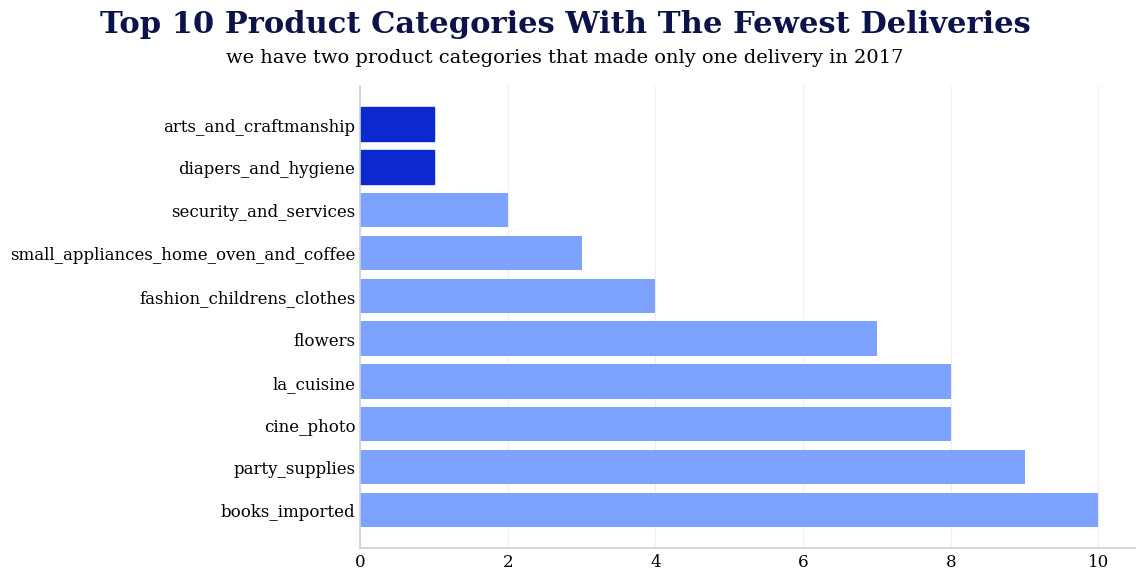

In [19]:
# Plotting "Top 10 Product Categories With The Fewest Deliveries" chart

# Creating a horizontal bar chart 
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) 

bars = ax.barh(product_category_delivered_the_least['product_category_name'], 
               product_category_delivered_the_least['order_id'], color= '#7da2ff')

# Highlighting the bars with the fewest values
bars[9].set_color('#0c29d0')
bars[8].set_color('#0c29d0')

# Customizing borders and grid
for s in ['top','right']:
    ax.spines[s].set_visible(False)

for s in ['bottom', 'left']:
    ax.spines[s].set_color('#cdd0d5')
    ax.spines[s].set_linewidth(1.2)

ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#EEEEEE')

# Adjusting the ticks
ax.tick_params(axis='both', which='major',length=0, labelfontfamily='serif', labelsize=12)

# Adding the texts in the chart
fig.text(0.33, 0.97, 'Top 10 Product Categories With The Fewest Deliveries', fontsize=22, fontweight='bold',
          fontfamily='serif', color='#0b134a', ha='center')
fig.text(0.33, 0.92, 'we have two product categories that made only one delivery in 2017', fontsize=14, fontweight='light',
          fontfamily='serif', color='black', ha='center')

plt.show()

#### Which State made the largest number of deliveries? 

In [20]:
# Creating the Dataframe
state_that_made_most_deliveries = delivered_analysis_dt[['customer_state', 'order_id']].groupby('customer_state').count().sort_values(by='order_id', ascending=False).reset_index()

# Adding the values ​​of states with low percentages and adding the sums into a variable called other_states
other_states = 0
for i, value in enumerate(state_that_made_most_deliveries['order_id']):
    if value <= 812: # Limit that I define to consider states with few deliveries
        other_states += value
        state_that_made_most_deliveries = state_that_made_most_deliveries.drop([i])

# adding a new line to the graph with the other_states variable
state_that_made_most_deliveries.loc[len(state_that_made_most_deliveries)] = ['Other States', other_states]

# creating column "%" to display values ​​in percentage format
state_that_made_most_deliveries['%'] = 100 * state_that_made_most_deliveries['order_id'] / state_that_made_most_deliveries.groupby('order_id')['order_id'].transform('sum').sum()
state_that_made_most_deliveries['%'] = state_that_made_most_deliveries['%'].map("{:.2f}%".format)

display(state_that_made_most_deliveries)


,customer_state,order_id,%
0,SP,16140,40.23%
1,RJ,5327,13.28%
2,MG,4898,12.21%
3,RS,2378,5.93%
4,PR,2038,5.08%
5,SC,1517,3.78%
6,BA,1363,3.40%
7,ES,868,2.16%
8,GO,819,2.04%
9,Other States,4767,11.88%


In [21]:
# Creating a dataframe with only the deliveries of São Paulo
delivery_SP = delivered_analysis_dt.loc[delivered_analysis_dt['customer_state'] == 'SP']

# Calculating the average per month of deliveries
average_deliveries_per_month_SP = delivery_SP['customer_state'].count()/12

display(average_deliveries_per_month_SP)

1345.0

In [22]:
# Creating a dataframe with the total deliveries of São Paulo per month
deliveries_per_month_SP = delivery_SP[['order_delivered_customer_month_name', 'order_id']].groupby('order_delivered_customer_month_name').count().sort_values(by='order_id').reset_index()

display(deliveries_per_month_SP)

,order_delivered_customer_month_name,order_id
0,January,120
1,February,514
2,April,691
3,March,903
4,June,1247
5,May,1432
6,July,1446
7,September,1467
8,October,1725
9,August,1728


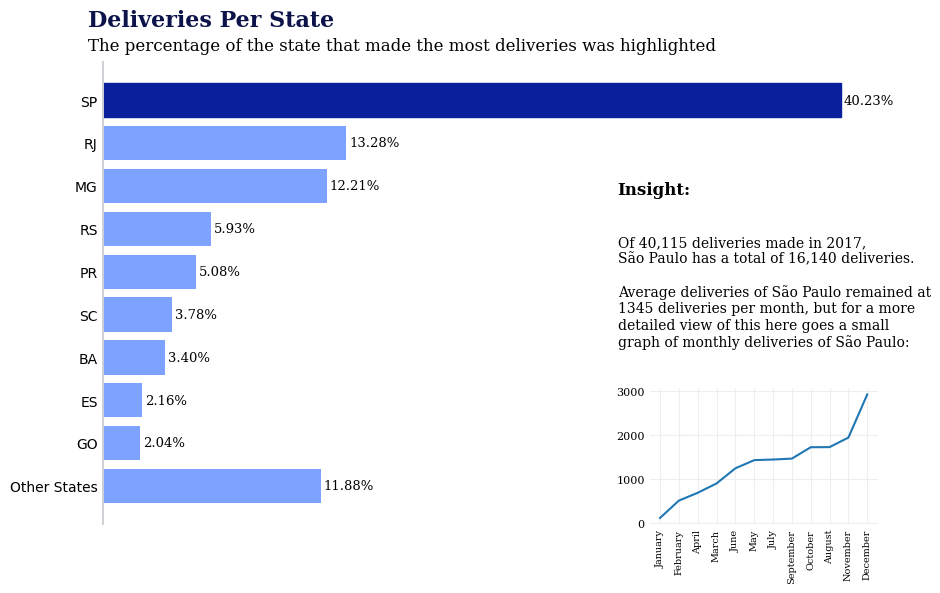

In [23]:
# Plotting the "Deliveries Per State" chart

# Creating The main chart (horizontal bar chart)
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) 

bars = ax.barh(state_that_made_most_deliveries['customer_state'], 
               state_that_made_most_deliveries['order_id'], color= '#7da2ff')

# Flipping the Y axis to align the largest category at the top
plt.gca().invert_yaxis()

# Adding bar labels in the chart 
plt.bar_label(bars, labels=state_that_made_most_deliveries['%'], fontsize=9.5, 
              fontfamily='serif', padding=2)

# Highlighting the bar with the highest value
bars[0].set_color('#0a1f9c')

# Customizing borders and grid
for s in ['top', 'right','bottom']:
    ax.spines[s].set_visible(False)

ax.spines['left'].set_color('#cdd0d5')
ax.spines['left'].set_linewidth(1.4)

ax.get_xaxis().set_visible(False)
ax.grid(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

# Adding the texts in the Main chart
fig.text(0.11, 0.94, 'Deliveries Per State', fontsize=16, fontweight='bold', fontfamily='serif', color='#0b134a')
fig.text(0.11, 0.90, 'The percentage of the state that made the most deliveries was highlighted',
          fontsize=12, fontweight='normal', fontfamily='serif')

# Adding the texts in the second chart
fig.text(0.64, 0.66, 'Insight:', fontsize=12, fontweight='bold', fontfamily='serif' )
fig.text(0.64, 0.38,  
'''Of 40,115 deliveries made in 2017,
São Paulo has a total of 16,140 deliveries.

Average deliveries of São Paulo remained at
1345 deliveries per month, but for a more
detailed view of this here goes a small 
graph of monthly deliveries of São Paulo: 
'''
, fontsize=10, fontweight='light', fontfamily='serif', color='Black')

# Creating The second chart (line chart)
line_chart = plt.subplot2grid((3, 3), (2, 2), rowspan=1, colspan=1)
line_chart.plot(deliveries_per_month_SP['order_delivered_customer_month_name'], 
                deliveries_per_month_SP['order_id'])

# Customizing borders and grid
for s in ['top', 'right','bottom','left']:
    line_chart.spines[s].set_visible(False)

line_chart.grid(True, color='#EEEEEE')

# Adjusting the ticks
line_chart.tick_params(axis='both', which='major', labelfontfamily='serif', labelsize=8, length=0)
line_chart.set_xticks(ticks=deliveries_per_month_SP['order_delivered_customer_month_name'],
                      labels=deliveries_per_month_SP['order_delivered_customer_month_name'],
                      fontsize=7, fontfamily='serif', rotation=90)

plt.show()

#### Which City made the largest number of deliveries? 

In [24]:
# Creating the dataframe 
city_that_made_most_deliveries = delivered_analysis_dt[['customer_city', 'order_id']].groupby('customer_city').count().sort_values(by='order_id', ascending=False).reset_index()[:10]

display(city_that_made_most_deliveries)

,customer_city,order_id
0,sao paulo,5792
1,rio de janeiro,2892
2,belo horizonte,1080
3,brasilia,804
4,porto alegre,616
5,curitiba,591
6,campinas,564
7,salvador,462
8,guarulhos,441
9,sao bernardo do campo,363


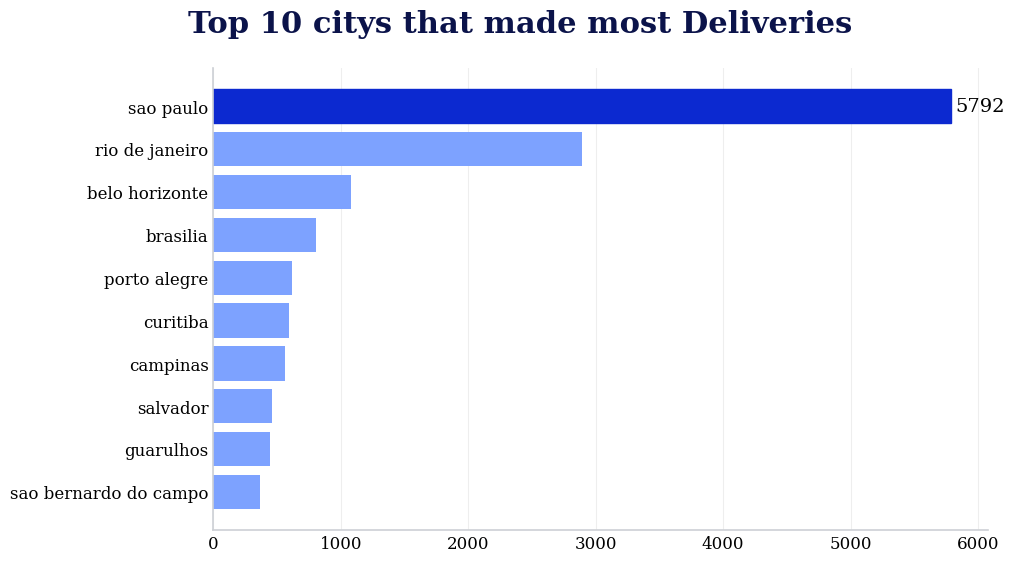

In [25]:
# Creating the "Top 10 citys that made most Deliveries" chart

# Creating a horizontal bar chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) 

bars = ax.barh(city_that_made_most_deliveries['customer_city'], 
               city_that_made_most_deliveries['order_id'], color= '#7da2ff')

# Flipping the Y axis to align the largest category at the top
plt.gca().invert_yaxis()

# Highlighting the bar with the highest value
bars[0].set_color('#0c29d0')

# Adding labels only to the bar with the highest value
plt.bar_label(bars, labels=[max(city_that_made_most_deliveries['order_id']) if x == max(city_that_made_most_deliveries['order_id']) else '' for x in city_that_made_most_deliveries['order_id']],
              padding=3, fontsize=14, fontfamily='serif')

# Customizing borders and grid
for s in ['top','right']:
    ax.spines[s].set_visible(False)

for s in ['bottom', 'left']:
    ax.spines[s].set_color('#cdd0d5')
    ax.spines[s].set_linewidth(1.2)

ax.set_axisbelow(True)
ax.xaxis.grid(True, color='#EEEEEE')

# Adjusting the ticks
ax.tick_params(axis='both', which='major', labelfontfamily='serif', labelsize=12, length=0)

# Adding the texts in the chart
fig.text(0.10, 0.94, 'Top 10 citys that made most Deliveries', fontsize=22, fontweight='bold',
          fontfamily='serif', color='#0b134a')

plt.show()

#### How it was the evolution of deliveries throughout the year ?

In [26]:
# Creating the dataframe
evolution_per_month = delivered_analysis_dt[['order_delivered_customer_month_name', 'order_id']].groupby('order_delivered_customer_month_name').count().sort_values(by='order_id').reset_index()

display(evolution_per_month)

,order_delivered_customer_month_name,order_id
0,January,281
1,February,1306
2,April,1807
3,March,2334
4,June,3154
5,July,3411
6,May,3665
7,September,3898
8,August,4249
9,October,4437


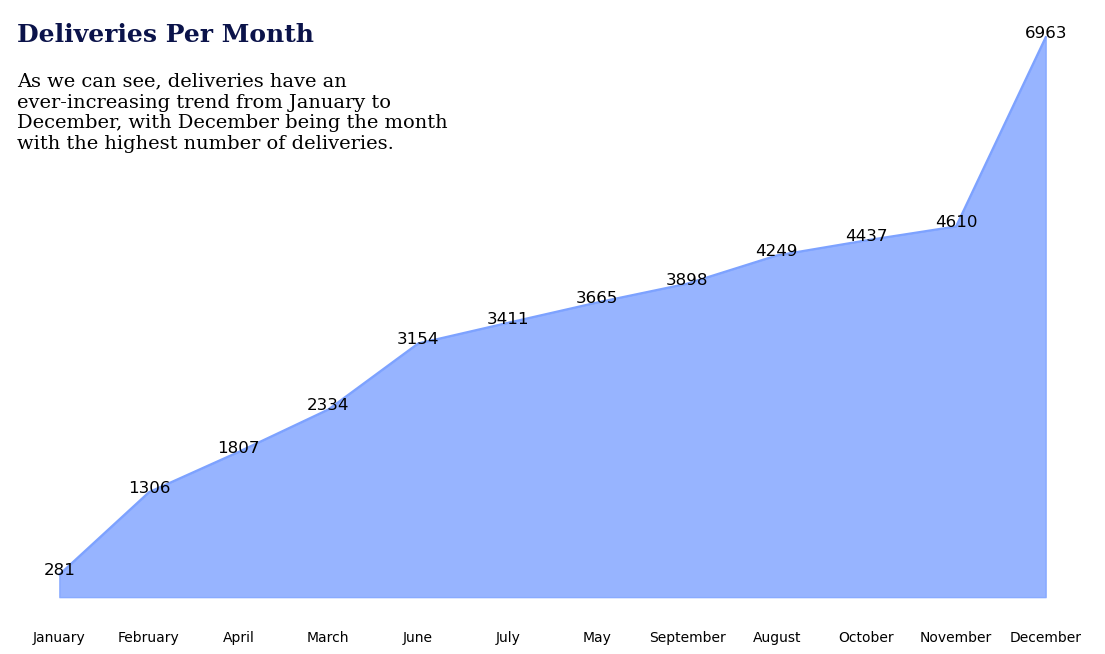

In [27]:
# Creating the "Deliveries Per Month" chart

# Creating a line chart
fig, ax = plt.subplots(1, 1, figsize=(14, 8)) 

ax.plot(evolution_per_month['order_delivered_customer_month_name'], evolution_per_month['order_id'], 
        color= '#7da2ff')

# filling the area to create an area chart
ax.fill_between(evolution_per_month['order_delivered_customer_month_name'], 0, 
                evolution_per_month['order_id'], color='#7da2ff', alpha=0.8)

# Customizing borders and grid
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.get_yaxis().set_visible(False)
ax.grid(False)

# Adjusting the ticks
ax.tick_params(axis='both', which='both',length=0)
ax.set_xticks(ticks=evolution_per_month['order_delivered_customer_month_name'], 
              labels=evolution_per_month['order_delivered_customer_month_name'], fontsize=10)

# adding the values in each point of the graph
for x, y in zip(evolution_per_month['order_delivered_customer_month_name'], evolution_per_month['order_id']):
    plt.text(x=x, y=y, s=y, fontsize=12, ha='center')

# Adding the texts in the chart
fig.text(0.13, 0.84, 'Deliveries Per Month', fontsize=18, fontweight='bold', fontfamily='serif', color='#0b134a')
fig.text(0.13, 0.68, 
'''As we can see, deliveries have an 
ever-increasing trend from January to 
December, with December being the month
with the highest number of deliveries.
'''
, fontsize=14, fontweight='normal', fontfamily='serif', color='Black')

plt.show()


#### Which state has the highest shipping average?

In [28]:
# Creating the dataframe
average_freight_per_state = delivered_analysis_dt[['customer_state', 'freight_value']].groupby('customer_state').mean().round(2).sort_values(by='freight_value', ascending=False).reset_index()

display(average_freight_per_state)

,customer_state,freight_value
0,RO,41.82
1,PB,39.30
2,AC,38.61
3,MA,36.00
4,SE,35.33
5,AL,34.53
6,PI,34.16
7,AP,33.99
8,RN,33.79
9,PA,33.34


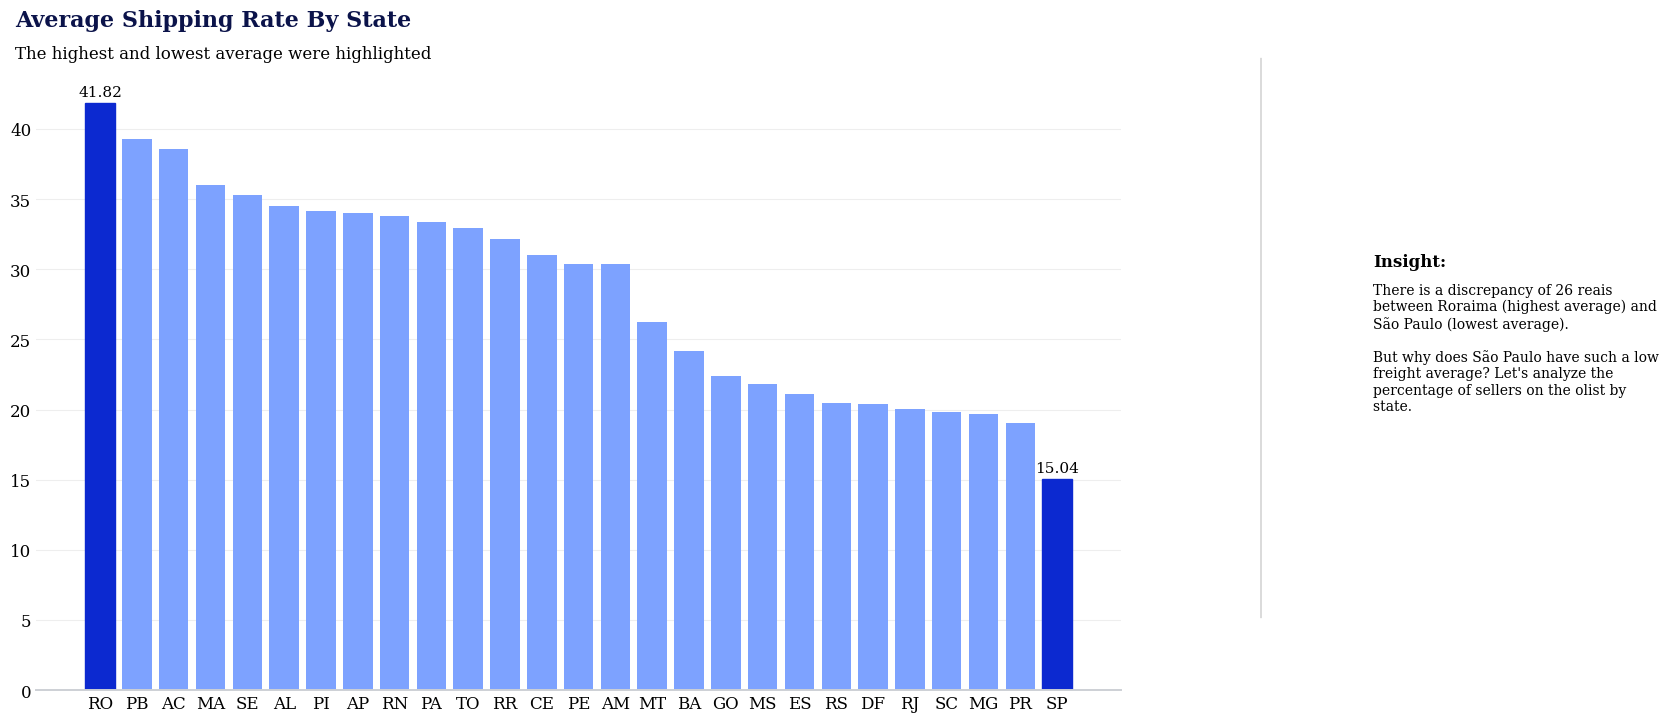

In [29]:
# Creating the "Average Shipping Rate By State" chart

# Creating a bar chart
fig, ax = plt.subplots(figsize=(14,8))

bars = ax.bar(average_freight_per_state['customer_state'], 
              average_freight_per_state['freight_value'], color='#7da2ff')

# Highlighting the bar with the highest value and the bar with the lowest value
bars[0].set_color('#0c29d0')
bars[26].set_color('#0c29d0')

# Customizing borders and grid
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('#cdd0d5')
ax.spines['bottom'].set_linewidth(1.4)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

# Adjusting the ticks
ax.tick_params(axis='both', which='major', length=0, labelfontfamily='serif', labelsize=12)

# Adding labels to the bar with the highest value and the bar with the lowest value
plt.bar_label(bars, labels=[f'{x:.2f}' if x == max(average_freight_per_state['freight_value']) or x == min(average_freight_per_state['freight_value']) else '' for x in average_freight_per_state['freight_value']],
              padding=3, fontsize=11, fontfamily='serif')

# Adding the texts in the chart (Title and suptitle)
fig.text(0.11, 0.94, 'Average Shipping Rate By State', fontsize=16, fontweight='bold', fontfamily='serif', color='#0b134a')
fig.text(0.11, 0.90, 'The highest and lowest average were highlighted', fontsize=12, fontweight='normal', fontfamily='serif', color='black')

# Adding a line to divide the chart and the insight
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0.2, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

# Adding the texts in the chart (insight)
fig.text(1.08, 0.64, 'Insight:', fontsize=12, fontweight='bold', fontfamily='serif' )
fig.text(1.08, 0.44,  
'''There is a discrepancy of 26 reais 
between Roraima (highest average) and
São Paulo (lowest average). 

But why does São Paulo have such a low
freight average? Let's analyze the 
percentage of sellers on the olist by
state. 
'''
, fontsize=10, fontweight='light', fontfamily='serif', color='Black')

plt.show()

#### How are sellers distributed by state ?

OBS -> This will be the only chart in which we will not use the main dataframe, which is "delivered_analysis_dt", but will use "sellers_dt", which will be more appropriate for grouping the number of sellers by state.

In [30]:
# Creating the dataframe
sellers_per_state = sellers_dt[['seller_state', 'seller_id']].groupby('seller_state').count().sort_values(by='seller_id', ascending=False).reset_index()

# Adding the values ​​of states with low percentages and adding the sums into a variable called other_states
other_states = 0
for i, value in enumerate(sellers_per_state['seller_id']):
    if value <= 19:
        other_states += value
        sellers_per_state = sellers_per_state.drop([i])

# adding a new line to the graph with the other_states variable
sellers_per_state.loc[len(sellers_per_state)] = ['Other States', other_states]

# creating column "%" to display values ​​in percentage format
sellers_per_state['%'] = 100 * sellers_per_state['seller_id'] / sellers_per_state.groupby('seller_state')['seller_id'].transform('sum').sum()
sellers_per_state['%'] = sellers_per_state['%'].map("{:.2f}%".format)

display(sellers_per_state)


,seller_state,seller_id,%
0,SP,1849,59.74%
1,PR,349,11.28%
2,MG,244,7.88%
3,SC,190,6.14%
4,RJ,171,5.53%
5,RS,129,4.17%
6,GO,40,1.29%
7,DF,30,0.97%
8,ES,23,0.74%
9,Other States,70,2.26%


In [31]:
# Calcutating the the total of sellers
total_sellers = sum(sellers_per_state['seller_id'])
print(total_sellers)

3095


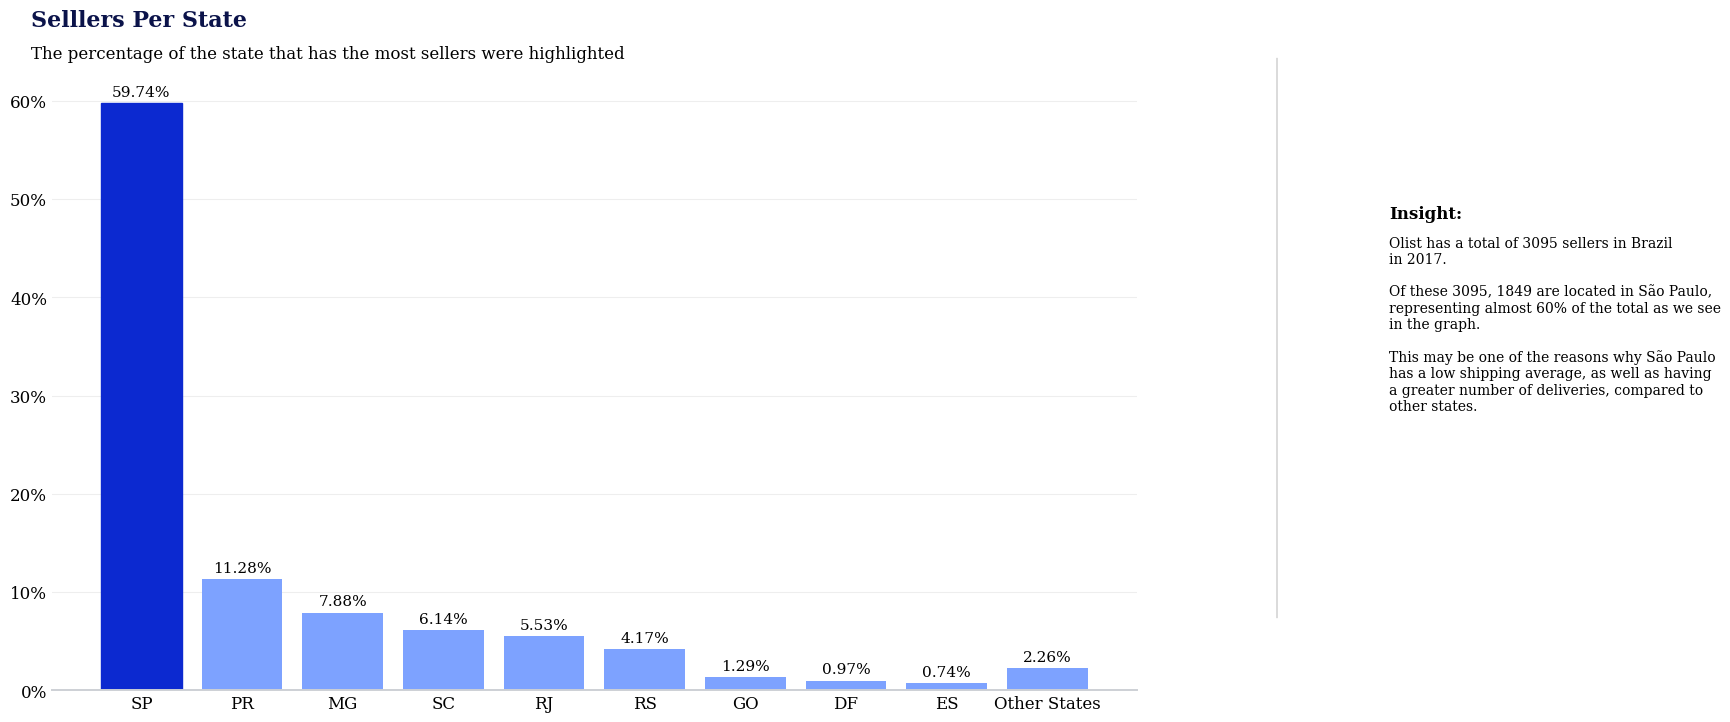

In [32]:
# Creating the "Sellers Per State" chart

# Importing libraries that allow us to transform the y axis into a percentage
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

# Creating a bar chart
fig, ax = plt.subplots(figsize=(14,8))

bars = ax.bar(sellers_per_state['seller_state'], 
              sellers_per_state['seller_id'], color='#7da2ff')

# setting the y-axis values ​​to percentage and jumping from 10 to 10
max_value = 3095
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{(x/max_value) * 100:.0f}%'))
plt.gca().yaxis.set_major_locator(MultipleLocator(max_value * 0.1))

# Highlighting the bar with the highest value
bars[0].set_color('#0c29d0')

# Customizing borders and grid
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
ax.spines['bottom'].set_color('#cdd0d5')
ax.spines['bottom'].set_linewidth(1.4)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

# Adjusting the ticks
ax.tick_params(axis='both', which='major', length=0, labelfontfamily='serif', labelsize=12)

# Adding bar labels
plt.bar_label(bars, labels= sellers_per_state['%'], padding=3, fontsize=11, fontfamily='serif')

# Adding the texts in the chart (title and suptitle)
fig.text(0.11, 0.94, 'Selllers Per State', fontsize=16, fontweight='bold', fontfamily='serif', color='#0b134a')
fig.text(0.11, 0.90, 'The percentage of the state that has the most sellers were highlighted', fontsize=12, fontweight='normal', fontfamily='serif', color='black')

# Adding a line to divide the chart and the insight
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0.2, 0.9], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

# Adding the texts in the chart (insight)
fig.text(1.08, 0.70, 'Insight:', fontsize=12, fontweight='bold', fontfamily='serif' )
fig.text(1.08, 0.44,  
'''Olist has a total of 3095 sellers in Brazil
in 2017.

Of these 3095, 1849 are located in São Paulo, 
representing almost 60% of the total as we see
in the graph.

This may be one of the reasons why São Paulo 
has a low shipping average, as well as having 
a greater number of deliveries, compared to 
other states.
'''
, fontsize=10, fontweight='light', fontfamily='serif', color='Black')

plt.show()